In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

## **Data Loading and Preparation**

In [ ]:
data = pd.read_csv("/content/IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## **Plotting Graph to Visualize Data.**


<ipython-input-39-58050425f6bd>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


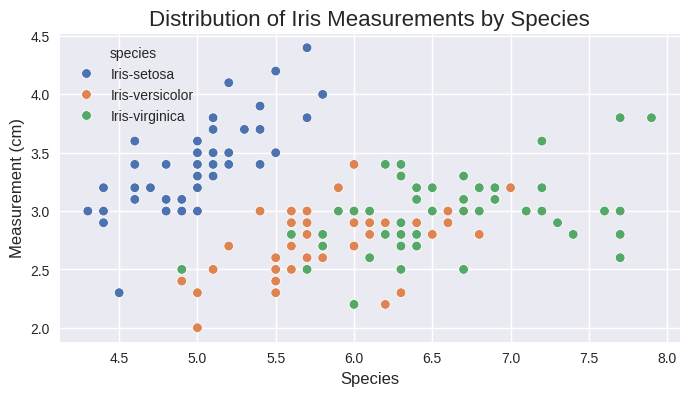

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(8, 4))

sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species', palette='deep')

plt.title('Distribution of Iris Measurements by Species', fontsize=16)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Measurement (cm)', fontsize=12)

plt.show()

## **Split,Train and Applying the Model.**

In [ ]:
X = data[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]
Y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, y_pred)*100,"%")


Accuracy:  100.0 %
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## **Classification Report.**


In [ ]:
print(classification_report(y_test, y_pred))

## **Results.**


In [ ]:
def get_float_input(prompt):
    while True:
        try:
            return float(input(prompt))
        except ValueError:
            print("Please enter a valid number.")

# Getting user input for new flower measurements
print("\nEnter measurements for the new flower:")
sep_length = get_float_input("Sepal length (cm): ")
sep_width = get_float_input("Sepal width (cm): ")
pet_length = get_float_input("Petal length (cm): ")
pet_width = get_float_input("Petal width (cm): ")
new_flower = [[sep_length, sep_width, pet_length, pet_width]]

prediction = knn.predict(new_flower)
print(f"\nPredicted species for new flower: {prediction[0]}")


Enter measurements for the new flower:
